Next, we'll define transformations for the MNIST dataset, download the data, and create data loaders. We'll also set up the device to use a GPU if available.

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

results = []

# Hyperparameters
input_size = 784 # 28x28 images
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transform)

# Data loaders
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False)

Using device: cpu


100%|██████████| 9.91M/9.91M [00:00<00:00, 36.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.44MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.80MB/s]


Now, let's define our neural network model. We'll use a simple feedforward neural network.

In [ ]:
# Neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)


NameError: name 'nn' is not defined

Next, we define the loss function and optimizer, then proceed with training the model.

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')


NameError: name 'nn' is not defined

Finally, let's evaluate the model on the test dataset.

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

# Save the model checkpoint if needed
# torch.save(model.state_dict(), 'model.ckpt')


NameError: name 'torch' is not defined

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# --- Device configuration, Hyperparameters, Dataset, and Data Loaders ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

input_size = 784 # 28x28 images
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transform,
                               download=True)

test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transform)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=False)

# --- Neural Network Model Definition ---
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# --- Loss and Optimizer ---
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# --- Training Loop ---
print("\nStarting model training...")
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')

# --- Model Evaluation ---
print("\nStarting model evaluation...")
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

# Optional: Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

print("\nScript execution complete.")


Using device: cpu


100%|██████████| 9.91M/9.91M [00:00<00:00, 58.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.70MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.64MB/s]



Starting model training...
Epoch [1/5], Step [100/600], Loss: 0.2012
Epoch [1/5], Step [200/600], Loss: 0.1428
Epoch [1/5], Step [300/600], Loss: 0.2330
Epoch [1/5], Step [400/600], Loss: 0.2042
Epoch [1/5], Step [500/600], Loss: 0.2326
Epoch [1/5], Step [600/600], Loss: 0.2833
Epoch [2/5], Step [100/600], Loss: 0.1437
Epoch [2/5], Step [200/600], Loss: 0.0482
Epoch [2/5], Step [300/600], Loss: 0.1346
Epoch [2/5], Step [400/600], Loss: 0.1589
Epoch [2/5], Step [500/600], Loss: 0.0386
Epoch [2/5], Step [600/600], Loss: 0.2122
Epoch [3/5], Step [100/600], Loss: 0.0952
Epoch [3/5], Step [200/600], Loss: 0.0294
Epoch [3/5], Step [300/600], Loss: 0.0250
Epoch [3/5], Step [400/600], Loss: 0.0473
Epoch [3/5], Step [500/600], Loss: 0.0828
Epoch [3/5], Step [600/600], Loss: 0.0232
Epoch [4/5], Step [100/600], Loss: 0.0287
Epoch [4/5], Step [200/600], Loss: 0.0480
Epoch [4/5], Step [300/600], Loss: 0.0576
Epoch [4/5], Step [400/600], Loss: 0.0507
Epoch [4/5], Step [500/600], Loss: 0.0878
Epoch 

In [ ]:
file_content = _dh[0]['_i'] # Get the content of the previous cell

with open('mnist_trainer.py', 'w') as f:
    f.write(file_content)

print("Code successfully written to 'mnist_trainer.py'")

TypeError: string indices must be integers, not 'str'

In [ ]:
import random, os, time
import numpy as np
import torch

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [ ]:
CONFIG = {
    "epochs": 10,
    "batch_size": 128,
    "lr": 1e-3,
    "optimizer": "adam",
    "early_stop_patience": 3,   # optional
}

In [ ]:
import torch.nn as nn
from sklearn.metrics import f1_score

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for x, y in loader:
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    return total_loss / total, correct / total


@torch.no_grad()
def evaluate(model, loader, criterion, device, compute_f1=False):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    all_preds = []
    all_true = []

    for x, y in loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        loss = criterion(logits, y)

        total_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)

        correct += (preds == y).sum().item()
        total += y.size(0)

        if compute_f1:
            all_preds.append(preds.detach().cpu().numpy())
            all_true.append(y.detach().cpu().numpy())

    avg_loss = total_loss / total
    acc = correct / total

    if compute_f1:
        all_preds = np.concatenate(all_preds)
        all_true = np.concatenate(all_true)
        f1 = f1_score(all_true, all_preds, average="binary")
        return avg_loss, acc, f1

    return avg_loss, acc

In [ ]:
def run_training(model, train_loader, val_loader, test_loader, config, device, compute_f1=False):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=config["lr"])

    history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
    start_time = time.time()

    best_val_loss = float("inf")
    patience = config.get("early_stop_patience", None)
    wait = 0
    best_state = None

    for epoch in range(config["epochs"]):
        tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
        if compute_f1:
            va_loss, va_acc, _ = evaluate(model, val_loader, criterion, device, compute_f1=True)
        else:
            va_loss, va_acc = evaluate(model, val_loader, criterion, device, compute_f1=False)

        history["train_loss"].append(tr_loss)
        history["train_acc"].append(tr_acc)
        history["val_loss"].append(va_loss)
        history["val_acc"].append(va_acc)

        print(f"Epoch {epoch+1}/{config['epochs']} | train loss {tr_loss:.4f} acc {tr_acc:.4f} | val loss {va_loss:.4f} acc {va_acc:.4f}")

        # Early stopping (optional)
        if patience is not None:
            if va_loss < best_val_loss:
                best_val_loss = va_loss
                best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print("Early stopping triggered.")
                    break

    # restore best
    if best_state is not None:
        model.load_state_dict(best_state)

    train_time = time.time() - start_time

    # Final test metrics
    if compute_f1:
        test_loss, test_acc, test_f1 = evaluate(model, test_loader, criterion, device, compute_f1=True)
        return history, train_time, test_acc, test_f1
    else:
        test_loss, test_acc = evaluate(model, test_loader, criterion, device, compute_f1=False)
        return history, train_time, test_acc, None

In [ ]:
import matplotlib.pyplot as plt

def plot_curves(history, title="Learning Curves"):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure()
    plt.plot(epochs, history["train_loss"], label="train_loss")
    plt.plot(epochs, history["val_loss"], label="val_loss")
    plt.title(title + " (Loss)")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs, history["train_acc"], label="train_acc")
    plt.plot(epochs, history["val_acc"], label="val_acc")
    plt.title(title + " (Accuracy)")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# --- CIFAR transforms ---
cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465),
                         (0.2470, 0.2435, 0.2616))
])

# --- download CIFAR-10 (change to CIFAR100 if needed) ---
full_train = datasets.CIFAR10(root="./data", train=True, download=True, transform=cifar_transform)
test_set   = datasets.CIFAR10(root="./data", train=False, download=True, transform=cifar_transform)

# --- split train into train/val ---
val_size = 5000
train_size = len(full_train) - val_size
train_set, val_set = random_split(full_train, [train_size, val_size], generator=torch.Generator().manual_seed(42))

batch_size = CONFIG["batch_size"]
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader   = DataLoader(val_set,   batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
test_loader  = DataLoader(test_set,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

print("CIFAR train/val/test:", len(train_set), len(val_set), len(test_set))


100%|██████████| 170M/170M [00:03<00:00, 55.7MB/s]


CIFAR train/val/test: 45000 5000 10000


In [ ]:
import torch.nn as nn

class MLP_CIFAR(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),                  # (B, 3, 32, 32) -> (B, 3072)
            nn.Linear(3*32*32, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
class CNN_CIFAR(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # 32x32
            nn.ReLU(),
            nn.MaxPool2d(2),                             # 16x16

            nn.Conv2d(32, 64, kernel_size=3, padding=1), # 16x16
            nn.ReLU(),
            nn.MaxPool2d(2),                             # 8x8
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*8*8, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1/10 | train loss 1.7674 acc 0.3709 | val loss 1.5883 acc 0.4422
Epoch 2/10 | train loss 1.6113 acc 0.4299 | val loss 1.5240 acc 0.4642
Epoch 3/10 | train loss 1.5526 acc 0.4516 | val loss 1.4748 acc 0.4886
Epoch 4/10 | train loss 1.5000 acc 0.4685 | val loss 1.4489 acc 0.4876
Epoch 5/10 | train loss 1.4678 acc 0.4801 | val loss 1.4313 acc 0.4970
Epoch 6/10 | train loss 1.4296 acc 0.4952 | val loss 1.4251 acc 0.4888
Epoch 7/10 | train loss 1.4023 acc 0.5032 | val loss 1.4021 acc 0.5100
Epoch 8/10 | train loss 1.3883 acc 0.5090 | val loss 1.4000 acc 0.5044
Epoch 9/10 | train loss 1.3502 acc 0.5203 | val loss 1.3905 acc 0.5182
Epoch 10/10 | train loss 1.3314 acc 0.5250 | val loss 1.3822 acc 0.5186
MLP CIFAR test acc: 0.5168 train_time_sec: 225.01231932640076


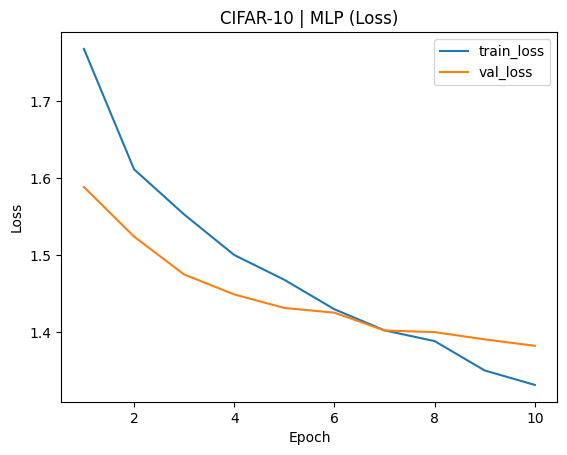

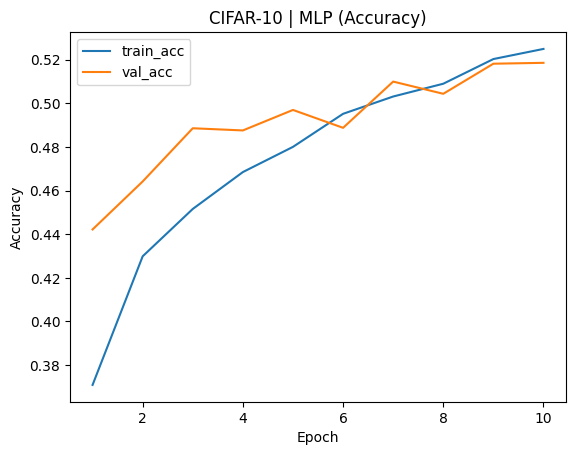

In [ ]:
model = MLP_CIFAR(num_classes=10).to(device)

history, train_time, test_acc, test_f1 = run_training(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    config=CONFIG,
    device=device,
    compute_f1=False
)

print("MLP CIFAR test acc:", test_acc, "train_time_sec:", train_time)
plot_curves(history, title="CIFAR-10 | MLP")

Epoch 1/10 | train loss 1.4111 acc 0.4928 | val loss 1.0927 acc 0.6136
Epoch 2/10 | train loss 1.0404 acc 0.6340 | val loss 0.9700 acc 0.6586
Epoch 3/10 | train loss 0.8860 acc 0.6892 | val loss 0.8644 acc 0.6992
Epoch 4/10 | train loss 0.7825 acc 0.7265 | val loss 0.8284 acc 0.7070
Epoch 5/10 | train loss 0.6893 acc 0.7567 | val loss 0.7914 acc 0.7210
Epoch 6/10 | train loss 0.6049 acc 0.7861 | val loss 0.8000 acc 0.7212
Epoch 7/10 | train loss 0.5216 acc 0.8153 | val loss 0.8044 acc 0.7294
Epoch 8/10 | train loss 0.4514 acc 0.8410 | val loss 0.8211 acc 0.7320
Early stopping triggered.
CNN CIFAR test acc: 0.7234 train_time_sec: 670.880820274353


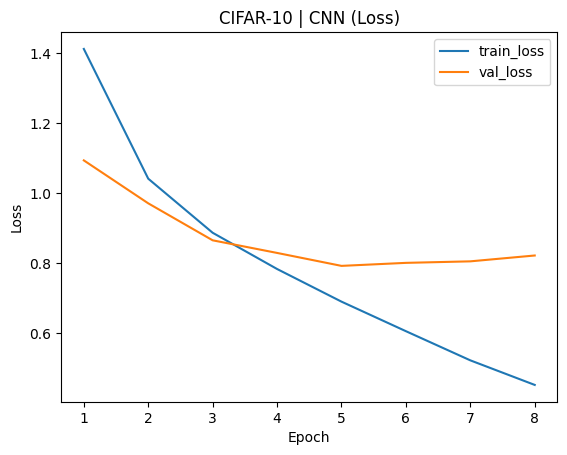

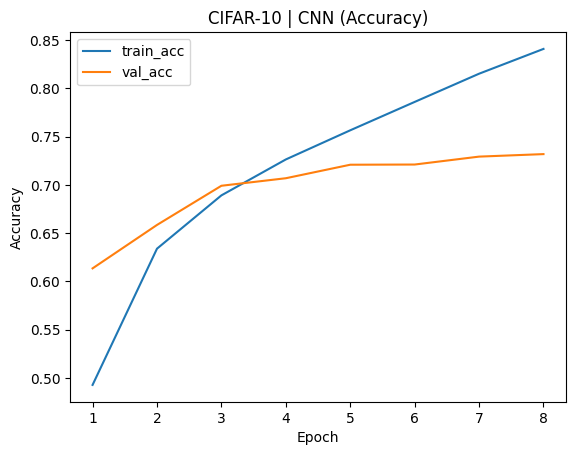

In [ ]:
model = CNN_CIFAR(num_classes=10).to(device)

history, train_time, test_acc, test_f1 = run_training(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    config=CONFIG,
    device=device,
    compute_f1=False
)

print("CNN CIFAR test acc:", test_acc, "train_time_sec:", train_time)
plot_curves(history, title="CIFAR-10 | CNN")

In [ ]:
!pip -q install medmnist


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 4.2 MB/s eta 0:00:00


In [2]:
# =========================
# CELL 0: Install deps
# =========================
!pip -q install scikit-learn pandas


In [3]:
# =========================
# CELL 1: Imports + seed + device
# =========================
import time
import random
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split, Subset
from torchvision import datasets, transforms

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
PIN_MEMORY = torch.cuda.is_available()
print("Using device:", device)


Using device: cpu


In [4]:
# =========================
# CELL 2: Config
# =========================
CFG = {
    "adult": {"batch_size": 256, "epochs": 12, "lr": 1e-3, "patience": 3},
    "cifar10": {"batch_size": 128, "epochs": 10, "lr": 1e-3, "patience": 3},
    # You can set max_*_samples to None for full data.
    "pcam": {
        "batch_size": 128, "epochs": 8, "lr": 1e-3, "patience": 2,
        "max_train_samples": 60000, "max_val_samples": 10000, "max_test_samples": 20000
    },
}

In [5]:
# =========================
# CELL 3: Utility functions
# =========================
def to_label_tensor(y):
    if not torch.is_tensor(y):
        y = torch.tensor(y)
    y = y.squeeze()
    if y.ndim == 0:
        y = y.unsqueeze(0)
    return y.long()

def subset_dataset(ds, max_samples, seed=SEED):
    if max_samples is None or len(ds) <= max_samples:
        return ds
    g = torch.Generator().manual_seed(seed)
    idx = torch.randperm(len(ds), generator=g)[:max_samples].tolist()
    return Subset(ds, idx)

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss, correct, total = 0.0, 0, 0

    for x, y in loader:
        x = x.to(device)
        y = to_label_tensor(y).to(device)

        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    return total_loss / total, correct / total

@torch.no_grad()
def evaluate(model, loader, criterion, device, task_type):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    all_preds, all_true = [], []

    for x, y in loader:
        x = x.to(device)
        y = to_label_tensor(y).to(device)

        logits = model(x)
        loss = criterion(logits, y)

        total_loss += loss.item() * x.size(0)
        preds = logits.argmax(dim=1)

        correct += (preds == y).sum().item()
        total += y.size(0)

        all_preds.append(preds.cpu().numpy())
        all_true.append(y.cpu().numpy())

    avg_loss = total_loss / total
    acc = correct / total

    all_preds = np.concatenate(all_preds)
    all_true = np.concatenate(all_true)

    if task_type == "binary":
        f1 = f1_score(all_true, all_preds, average="binary")
    else:
        f1 = f1_score(all_true, all_preds, average="macro")

    return avg_loss, acc, f1

def run_training(model, train_loader, val_loader, test_loader, lr, epochs, patience, task_type):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}
    best_val_loss = float("inf")
    best_state = None
    best_epoch = 0
    wait = 0
    start = time.time()

    for epoch in range(epochs):
        tr_loss, tr_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
        va_loss, va_acc, _ = evaluate(model, val_loader, criterion, device, task_type)

        history["train_loss"].append(tr_loss)
        history["train_acc"].append(tr_acc)
        history["val_loss"].append(va_loss)
        history["val_acc"].append(va_acc)

        print(f"Epoch {epoch+1}/{epochs} | train_loss {tr_loss:.4f} acc {tr_acc:.4f} | val_loss {va_loss:.4f} acc {va_acc:.4f}")

        if va_loss < best_val_loss:
            best_val_loss = va_loss
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
            best_epoch = epoch + 1
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("Early stopping.")
                break

    if best_state is not None:
        model.load_state_dict(best_state)

    train_time = time.time() - start
    test_loss, test_acc, test_f1 = evaluate(model, test_loader, criterion, device, task_type)

    summary = {
        "best_epoch": best_epoch,
        "test_loss": test_loss,
        "test_acc": test_acc,
        "test_f1": test_f1,
        "train_time_sec": train_time,
    }
    return history, summary


In [6]:
# =========================
# CELL 4: Models
# =========================
class MLPTabular(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        return self.net(x)

class CNNTabular1D(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(2),
        )
        out_len = max(1, input_dim // 4)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * out_len, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes),
        )

    def forward(self, x):
        if x.ndim == 2:
            x = x.unsqueeze(1)  # [B, 1, D]
        x = self.features(x)
        return self.classifier(x)

class MLPImage(nn.Module):
    def __init__(self, in_channels, img_size, num_classes):
        super().__init__()
        in_dim = in_channels * img_size * img_size
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        return self.net(x)

class CNNImage(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.pool = nn.AdaptiveAvgPool2d((4, 4))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 4 * 4, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.pool(x)
        return self.classifier(x)


In [7]:
# =========================
# CELL 5: Dataset loaders
# =========================
def load_adult(batch_size):
    adult = fetch_openml(name="adult", version=2, as_frame=True)
    df = adult.frame.copy()

    # target
    y = (df["class"].astype(str).str.contains(">50K")).astype(int).values
    X = df.drop(columns=["class"]).replace("?", np.nan)

    cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
    num_cols = X.select_dtypes(exclude=["object", "category"]).columns.tolist()

    try:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
    except TypeError:
        ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

    num_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])
    cat_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", ohe),
    ])
    pre = ColumnTransformer([
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ])

    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED, stratify=y
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.1, random_state=SEED, stratify=y_train_full
    )

    X_train = pre.fit_transform(X_train).astype(np.float32)
    X_val = pre.transform(X_val).astype(np.float32)
    X_test = pre.transform(X_test).astype(np.float32)

    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)

    y_train = torch.tensor(y_train, dtype=torch.long)
    y_val = torch.tensor(y_val, dtype=torch.long)
    y_test = torch.tensor(y_test, dtype=torch.long)

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True, pin_memory=PIN_MEMORY)
    val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False, pin_memory=PIN_MEMORY)
    test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False, pin_memory=PIN_MEMORY)

    meta = {"input_dim": X_train.shape[1], "num_classes": 2, "task_type": "binary", "dataset_name": "Adult"}
    return train_loader, val_loader, test_loader, meta

def load_cifar10(batch_size):
    tfm = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)),
    ])

    full_train = datasets.CIFAR10(root="./data", train=True, transform=tfm, download=True)
    test_set = datasets.CIFAR10(root="./data", train=False, transform=tfm, download=True)

    train_size = 45000
    val_size = len(full_train) - train_size
    g = torch.Generator().manual_seed(SEED)
    train_set, val_set = random_split(full_train, [train_size, val_size], generator=g)

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=PIN_MEMORY)
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=PIN_MEMORY)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=PIN_MEMORY)

    meta = {"in_channels": 3, "img_size": 32, "num_classes": 10, "task_type": "multiclass", "dataset_name": "CIFAR-10"}
    return train_loader, val_loader, test_loader, meta

def load_pcam(batch_size, max_train_samples=None, max_val_samples=None, max_test_samples=None):
    if not hasattr(datasets, "PCAM"):
        raise RuntimeError("torchvision.datasets.PCAM is not available in this runtime. Upgrade torchvision or use a runtime where PCAM exists.")

    tfm = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

    train_set = datasets.PCAM(root="./data", split="train", transform=tfm, download=True)
    val_set = datasets.PCAM(root="./data", split="val", transform=tfm, download=True)
    test_set = datasets.PCAM(root="./data", split="test", transform=tfm, download=True)

    train_set = subset_dataset(train_set, max_train_samples, seed=SEED)
    val_set = subset_dataset(val_set, max_val_samples, seed=SEED)
    test_set = subset_dataset(test_set, max_test_samples, seed=SEED)

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=PIN_MEMORY)
    val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=PIN_MEMORY)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=PIN_MEMORY)

    meta = {"in_channels": 3, "img_size": 96, "num_classes": 2, "task_type": "binary", "dataset_name": "PCam"}
    return train_loader, val_loader, test_loader, meta

In [8]:
# =========================
# CELL 6: Build model helper
# =========================
def build_model(dataset_key, arch, meta):
    if dataset_key == "adult":
        if arch == "MLP":
            return MLPTabular(meta["input_dim"], meta["num_classes"])
        elif arch == "CNN":
            return CNNTabular1D(meta["input_dim"], meta["num_classes"])
    else:
        if arch == "MLP":
            return MLPImage(meta["in_channels"], meta["img_size"], meta["num_classes"])
        elif arch == "CNN":
            return CNNImage(meta["in_channels"], meta["num_classes"])
    raise ValueError(f"Unsupported combination: {dataset_key}, {arch}")


In [17]:
# =========================
# CELL 7: Run all required experiments (6 total)
# =========================
results = []

dataset_loaders = {
    "adult": lambda: load_adult(CFG["adult"]["batch_size"]),
    "cifar10": lambda: load_cifar10(CFG["cifar10"]["batch_size"]),
   "pcam": lambda: load_pcam_safe(
    CFG["pcam"]["batch_size"],
    CFG["pcam"]["max_train_samples"],
    CFG["pcam"]["max_val_samples"],
    CFG["pcam"]["max_test_samples"],
),

}

for dkey in ["adult", "cifar10", "pcam"]:
    print("\n" + "=" * 80)
    print("Loading dataset:", dkey)
    train_loader, val_loader, test_loader, meta = dataset_loaders[dkey]()
    print(f"{meta['dataset_name']} loaded.")

    for arch in ["MLP", "CNN"]:
        print("\n" + "-" * 80)
        print(f"Running {meta['dataset_name']} + {arch}")

        model = build_model(dkey, arch, meta).to(device)
        cfg = CFG[dkey]

        history, summary = run_training(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            test_loader=test_loader,
            lr=cfg["lr"],
            epochs=cfg["epochs"],
            patience=cfg["patience"],
            task_type=meta["task_type"],
        )

        row = {
            "Dataset": meta["dataset_name"],
            "Architecture": arch,
            "Accuracy": round(summary["test_acc"], 4),
            "F1": round(summary["test_f1"], 4),
            "Train Time (sec)": round(summary["train_time_sec"], 1),
            "Notes": f"best_epoch={summary['best_epoch']}",
        }
        results.append(row)
        print("Result:", row)

results_df = pd.DataFrame(results)
print("\nFinal Results")
display(results_df)



Loading dataset: adult
Adult loaded.

--------------------------------------------------------------------------------
Running Adult + MLP
Epoch 1/12 | train_loss 0.3662 acc 0.8224 | val_loss 0.3094 acc 0.8621
Epoch 2/12 | train_loss 0.3141 acc 0.8524 | val_loss 0.3104 acc 0.8580
Epoch 3/12 | train_loss 0.3094 acc 0.8542 | val_loss 0.3043 acc 0.8605
Epoch 4/12 | train_loss 0.3067 acc 0.8570 | val_loss 0.3073 acc 0.8636
Epoch 5/12 | train_loss 0.3040 acc 0.8590 | val_loss 0.3059 acc 0.8636
Epoch 6/12 | train_loss 0.3018 acc 0.8595 | val_loss 0.3058 acc 0.8600
Early stopping.
Result: {'Dataset': 'Adult', 'Architecture': 'MLP', 'Accuracy': 0.8581, 'F1': 0.6737, 'Train Time (sec)': 7.9, 'Notes': 'best_epoch=3'}

--------------------------------------------------------------------------------
Running Adult + CNN
Epoch 1/12 | train_loss 0.3802 acc 0.8220 | val_loss 0.3210 acc 0.8588
Epoch 2/12 | train_loss 0.3244 acc 0.8491 | val_loss 0.3159 acc 0.8549
Epoch 3/12 | train_loss 0.3168 acc 0.8

100%|██████████| 170M/170M [00:04<00:00, 39.9MB/s]


CIFAR-10 loaded.

--------------------------------------------------------------------------------
Running CIFAR-10 + MLP
Epoch 1/10 | train_loss 1.7758 acc 0.3686 | val_loss 1.5961 acc 0.4352
Epoch 2/10 | train_loss 1.6232 acc 0.4260 | val_loss 1.5282 acc 0.4704
Epoch 3/10 | train_loss 1.5564 acc 0.4512 | val_loss 1.4995 acc 0.4772
Epoch 4/10 | train_loss 1.5051 acc 0.4671 | val_loss 1.4691 acc 0.4910
Epoch 5/10 | train_loss 1.4681 acc 0.4818 | val_loss 1.4394 acc 0.4912
Epoch 6/10 | train_loss 1.4362 acc 0.4904 | val_loss 1.3994 acc 0.5082
Epoch 7/10 | train_loss 1.4033 acc 0.5016 | val_loss 1.4182 acc 0.5010
Epoch 8/10 | train_loss 1.3806 acc 0.5088 | val_loss 1.3822 acc 0.5122
Epoch 9/10 | train_loss 1.3498 acc 0.5206 | val_loss 1.3825 acc 0.5112
Epoch 10/10 | train_loss 1.3280 acc 0.5268 | val_loss 1.3863 acc 0.5152
Result: {'Dataset': 'CIFAR-10', 'Architecture': 'MLP', 'Accuracy': 0.517, 'F1': 0.5167, 'Train Time (sec)': 211.1, 'Notes': 'best_epoch=8'}

--------------------------

,Dataset,Architecture,Accuracy,F1,Train Time (sec),Notes
0,Adult,MLP,0.8581,0.6737,7.9,best_epoch=3
1,Adult,CNN,0.8624,0.6885,94.2,best_epoch=12
2,CIFAR-10,MLP,0.5170,0.5167,211.1,best_epoch=8
3,CIFAR-10,CNN,0.7410,0.7383,765.4,best_epoch=10
4,PCam,MLP,0.6770,0.6888,284.4,best_epoch=1
5,PCam,CNN,0.7710,0.7910,1515.0,best_epoch=1


In [18]:
results_df.to_csv("results_table.csv", index=False)
print("saved")


saved


In [9]:
# Replace PCam loaders with this
!pip -q install datasets

from datasets import load_dataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch

class HFPcamDataset(Dataset):
    def __init__(self, split_ds, transform=None):
        self.ds = split_ds
        self.transform = transform

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, idx):
        row = self.ds[idx]
        img = row["image"].convert("RGB")
        y = int(row["label"])
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(y, dtype=torch.long)

def load_pcam_safe(batch_size, max_train_samples=None, max_val_samples=None, max_test_samples=None):
    tfm = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

    hf = load_dataset("zacharielegault/PatchCamelyon")
    val_key = "validation" if "validation" in hf else "val"

    train_set = HFPcamDataset(hf["train"], transform=tfm)
    val_set   = HFPcamDataset(hf[val_key], transform=tfm)
    test_set  = HFPcamDataset(hf["test"], transform=tfm)

    train_set = subset_dataset(train_set, max_train_samples, seed=SEED)
    val_set   = subset_dataset(val_set, max_val_samples, seed=SEED)
    test_set  = subset_dataset(test_set, max_test_samples, seed=SEED)

    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True,  num_workers=2, pin_memory=PIN_MEMORY)
    val_loader   = DataLoader(val_set,   batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=PIN_MEMORY)
    test_loader  = DataLoader(test_set,  batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=PIN_MEMORY)

    meta = {"in_channels": 3, "img_size": 96, "num_classes": 2, "task_type": "binary", "dataset_name": "PCam"}
    return train_loader, val_loader, test_loader, meta


In [10]:
import time

def load_pcam_with_retry(batch_size, max_train_samples=None, max_val_samples=None, max_test_samples=None, retries=5):
    for i in range(retries):
        try:
            return load_pcam(batch_size, max_train_samples, max_val_samples, max_test_samples)
        except Exception as e:
            msg = str(e)
            if "Too many users have viewed or downloaded this file recently" in msg and i < retries - 1:
                wait_s = 120 * (i + 1)
                print(f"PCam download rate-limited. Retry {i+1}/{retries} in {wait_s}s...")
                time.sleep(wait_s)
            else:
                raise


In [11]:
import pandas as pd

if "results" in globals() and len(results) > 0:
    results_df = pd.DataFrame(results)
    display(results_df)
    results_df.to_csv("results_table.csv", index=False)
    print("Saved: results_table.csv")
else:
    print("`results` is missing or empty. Re-run Cell 7 first.")


`results` is missing or empty. Re-run Cell 7 first.


In [14]:
# =========================
# CELL 9: Learning curves (per run)
# =========================
import matplotlib.pyplot as plt

def plot_history(history, title_prefix="Run"):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure(figsize=(6,4))
    plt.plot(epochs, history["train_loss"], label="train_loss")
    plt.plot(epochs, history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title_prefix} - Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,4))
    plt.plot(epochs, history["train_acc"], label="train_acc")
    plt.plot(epochs, history["val_acc"], label="val_acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title_prefix} - Accuracy")
    plt.legend()
    plt.show()


In [12]:
# 1) make PCam run faster (< 1 hour target)
CFG["pcam"]["epochs"] = 5
CFG["pcam"]["max_train_samples"] = 30000
CFG["pcam"]["max_val_samples"] = 5000
CFG["pcam"]["max_test_samples"] = 10000
CFG["pcam"]["batch_size"] = 128
CFG["pcam"]["patience"] = 2


In [13]:
# 2) rerun ONLY PCam + CNN
train_loader, val_loader, test_loader, meta = load_pcam_safe(
    CFG["pcam"]["batch_size"],
    CFG["pcam"]["max_train_samples"],
    CFG["pcam"]["max_val_samples"],
    CFG["pcam"]["max_test_samples"],
)

model = build_model("pcam", "CNN", meta).to(device)

history, summary = run_training(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader,
    lr=CFG["pcam"]["lr"],
    epochs=CFG["pcam"]["epochs"],
    patience=CFG["pcam"]["patience"],
    task_type=meta["task_type"],
)

new_row = {
    "Dataset": "PCam",
    "Architecture": "CNN",
    "Accuracy": round(summary["test_acc"], 4),
    "F1": round(summary["test_f1"], 4),
    "Train Time (sec)": round(summary["train_time_sec"], 1),
    "Notes": f"best_epoch={summary['best_epoch']}"
}
print("Updated PCam CNN row:", new_row)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00003.parquet:   0%|          | 0.00/356M [00:00<?, ?B/s]

data/train-00001-of-00003.parquet:   0%|          | 0.00/370M [00:00<?, ?B/s]

data/train-00002-of-00003.parquet:   0%|          | 0.00/385M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/140M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/136M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/262144 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/32768 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/32768 [00:00<?, ? examples/s]

Epoch 1/5 | train_loss 0.4981 acc 0.7642 | val_loss 0.4536 acc 0.7660
Epoch 2/5 | train_loss 0.4360 acc 0.8021 | val_loss 0.4462 acc 0.7866
Epoch 3/5 | train_loss 0.3963 acc 0.8270 | val_loss 0.4539 acc 0.7956
Epoch 4/5 | train_loss 0.3781 acc 0.8370 | val_loss 0.4239 acc 0.8060
Epoch 5/5 | train_loss 0.3707 acc 0.8397 | val_loss 0.4121 acc 0.8052
Updated PCam CNN row: {'Dataset': 'PCam', 'Architecture': 'CNN', 'Accuracy': 0.7772, 'F1': 0.7534, 'Train Time (sec)': 2654.5, 'Notes': 'best_epoch=5'}
